В этом задании вам предстоит поучаствовать в соревновании на kaggle inclass

Перейдите по ссылке на страницу соревнования:

https://inclass.kaggle.com/c/telecom-clients-prediction2

И приступайте!

В соревновании вы будете работать с той же выборкой, что и ранее, поэтому воспользуйтесь результатами, полученными на предыдущих неделях. Для успешного участия в соревновании необходимо преодолеть по качеству beseline решение.

In [1]:
import pandas as pd
import numpy as np
import warnings 
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train', header=None)
X_test = pd.read_csv('orange_small_churn_test_data.csv')
#считываем данные

In [3]:
del X_test['ID']
#удаляем колонку ID из тестовой выборки
X_test.shape

(10000, 230)

In [4]:
data_full = pd.concat([data, X_test])
#присоеденим тестовую часть для предобработки

In [5]:
data_full.dropna(how='all', axis=1, inplace=True)
data_full.shape
#удалим полностью пустые столбцы

(50000, 212)

In [6]:
data_full.fillna(0, inplace=True)
#заменим все пустые значения на 0

Из предыдущего задания мы уже знаем, что количество пустых столбцов среди числовых признаков - 16, а среди категориальных - 2.

In [7]:
scl = StandardScaler()

In [8]:
data_full.iloc[:, :174] = scl.fit_transform(data_full.iloc[:, :174])
#стандартизуем числовые данные 

/home/double_dee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/double_dee/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
data_full.iloc[:, 174:] = data_full.iloc[:, 174:].astype('str')
#приведем все значения категориальных признаков к одному типу

In [10]:
# для преобразования категориальных фич используем LabelEncoder
le = LabelEncoder()
for i in range(174, 212):
    data_full.iloc[:, i] = le.fit_transform(data_full.iloc[:, i])

In [11]:
X_test = data_full.iloc[40000:, :]
data = data_full.iloc[:40000, :]
#отделим тестовую выборку

In [12]:
gbs = GradientBoostingClassifier(n_estimators=200, verbose=1, random_state=1)

In [13]:
gbs.fit(data, labels)

/home/double_dee/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           0.5236            1.10m
         2           0.5190            1.08m
         3           0.5153            1.10m
         4           0.5117            1.12m
         5           0.5082            1.10m
         6           0.5051            1.11m
         7           0.5022            1.10m
         8           0.4995            1.09m
         9           0.4978            1.05m
        10           0.4957            1.05m
        20           0.4824           57.75s
        30           0.4745           53.56s
        40           0.4689           49.53s
        50           0.4652           45.96s
        60           0.4618           43.21s
        70           0.4589           39.68s
        80           0.4560           36.79s
        90           0.4539           33.06s
       100           0.4513           29.61s
       200           0.4307            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [16]:
submission = pd.DataFrame()
submission['ID'] = range(len(X_test))
submission['result'] = gbs.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv',index = False, sep = ',')

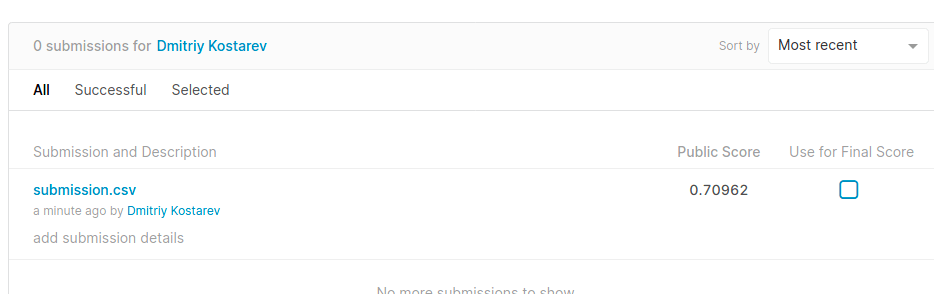

In [17]:
from IPython.display import Image
with open('result.png', 'rb') as pic:
    display(Image(data=pic.read(), format='png'))

Задание выполнено, baseline побит